# Get the data



In [1]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

--2023-06-18 12:19:05--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  23.3MB/s    in 8.1s    

2023-06-18 12:19:13 (19.9 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
!ls

10_food_classes_10_percent.zip	sample_data


In [3]:
!unzip 10_food_classes_10_percent.zip

Archive:  10_food_classes_10_percent.zip
   creating: 10_food_classes_10_percent/
  inflating: __MACOSX/._10_food_classes_10_percent  
   creating: 10_food_classes_10_percent/test/
  inflating: __MACOSX/10_food_classes_10_percent/._test  
   creating: 10_food_classes_10_percent/train/
  inflating: __MACOSX/10_food_classes_10_percent/._train  
   creating: 10_food_classes_10_percent/test/ice_cream/
  inflating: __MACOSX/10_food_classes_10_percent/test/._ice_cream  
   creating: 10_food_classes_10_percent/test/chicken_curry/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_curry  
   creating: 10_food_classes_10_percent/test/steak/
  inflating: __MACOSX/10_food_classes_10_percent/test/._steak  
   creating: 10_food_classes_10_percent/test/sushi/
  inflating: __MACOSX/10_food_classes_10_percent/test/._sushi  
   creating: 10_food_classes_10_percent/test/chicken_wings/
  inflating: __MACOSX/10_food_classes_10_percent/test/._chicken_wings  
   creating: 10_food_classes_10_per

In [4]:
!ls

10_food_classes_10_percent	__MACOSX
10_food_classes_10_percent.zip	sample_data


# Explore given Data

In [5]:
import os
train_dir = "./10_food_classes_10_percent/train"
test_dir = "./10_food_classes_10_percent/test"
list_of_classes = os.listdir(train_dir)
print("Number of classes : ", len(list_of_classes))
print(" All class names : " , list_of_classes)

Number of classes :  10
 All class names :  ['chicken_curry', 'ice_cream', 'sushi', 'hamburger', 'fried_rice', 'chicken_wings', 'steak', 'grilled_salmon', 'ramen', 'pizza']


In [6]:
from glob import glob
def explore_given_dir(dir_name):
    print("Details of : ", dir_name)
    for cls_name in list_of_classes:
        current_dir = dir_name + "/" + cls_name
        num_of_imgs = len(glob(current_dir + "/*"))
        print("Number of images in ", cls_name, " : ", num_of_imgs )

In [7]:
explore_given_dir(train_dir)

Details of :  ./10_food_classes_10_percent/train
Number of images in  chicken_curry  :  75
Number of images in  ice_cream  :  75
Number of images in  sushi  :  75
Number of images in  hamburger  :  75
Number of images in  fried_rice  :  75
Number of images in  chicken_wings  :  75
Number of images in  steak  :  75
Number of images in  grilled_salmon  :  75
Number of images in  ramen  :  75
Number of images in  pizza  :  75


In [8]:
explore_given_dir(test_dir)

Details of :  ./10_food_classes_10_percent/test
Number of images in  chicken_curry  :  250
Number of images in  ice_cream  :  250
Number of images in  sushi  :  250
Number of images in  hamburger  :  250
Number of images in  fried_rice  :  250
Number of images in  chicken_wings  :  250
Number of images in  steak  :  250
Number of images in  grilled_salmon  :  250
Number of images in  ramen  :  250
Number of images in  pizza  :  250


# Visulizing few images

In [9]:
import tensorflow as tf
from glob import glob
import matplotlib.pyplot as plt
import random
def visulize_random_img(dir_name):
    for i in range(0,9):
        cls_name = list_of_classes[i]
        current_dir = dir_name + "/" + cls_name
        img_list = glob(current_dir+"/*")
        current_img = img_list[random.randint(0,len(img_list))]
        current_img = tf.io.read_file(current_img)
        current_img = tf.image.decode_image(current_img)
        plt.figure()
        plt.imshow(current_img)
        plt.axis("off")
        plt.title(cls_name + str(current_img.shape))

In [10]:
visulize_random_img(train_dir)

Output hidden; open in https://colab.research.google.com to view.

In [11]:
visulize_random_img(test_dir)

Output hidden; open in https://colab.research.google.com to view.

# Preparing Data Loaders

In [12]:
tf.random.set_seed(42)
train_data, valid_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                            class_names=list_of_classes,
                                            batch_size=32,
                                            image_size=(400,400),
                                            shuffle=True,
                                            seed=42,
                                            validation_split=0.2,
                                            subset="both")

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                            class_names=list_of_classes,
                                            batch_size=32,
                                            image_size=(400,400),
                                            shuffle=True,
                                            seed=42,
                                            )

Found 750 files belonging to 10 classes.
Using 600 files for training.
Using 150 files for validation.
Found 2500 files belonging to 10 classes.


In [13]:
print("Number of bathces in train , valid, test :" )
len(train_data) , len(valid_data) , len(test_data)

Number of bathces in train , valid, test :


(19, 5, 79)

# Pre-processing and agumenting

In [14]:
tf.random.set_seed(42)
resize_and_normilize = tf.keras.Sequential(
    [
        tf.keras.layers.Resizing(height=256, width=256),
        tf.keras.layers.Rescaling(scale=1/255.),
    ]
)

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip(mode="horizontal_and_vertical", seed=42),
        tf.keras.layers.RandomRotation(factor=0.2, seed=42),
        tf.keras.layers.RandomContrast(factor=0.2, seed=42),
    ]
)

In [15]:
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, augment=False):
  # Resize and rescale all datasets.
  ds = ds.map(lambda x, y: (resize_and_normilize(x), y),
              num_parallel_calls=AUTOTUNE)

  # Use data augmentation only on the training set.
  if augment:
    ds = ds.map(lambda x, y: (data_augmentation(x), y),
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
  return ds.prefetch(buffer_size=AUTOTUNE)

In [16]:
train_data_aug = prepare(train_data, augment=True)
train_data = prepare(train_data, augment=False)
valid_data = prepare(valid_data, augment=False)
test_data = prepare(test_data, augment=False)

In [17]:
print("Number of bathces in train , train_aug, valid, test :" )
len(train_data) , len(train_data_aug) , len(valid_data) , len(test_data)

Number of bathces in train , train_aug, valid, test :


(19, 19, 5, 79)

In [18]:
train_data_concat = train_data.concatenate(train_data_aug)
train_data_concat = train_data_concat.shuffle(buffer_size=32)

In [19]:
print("Number of bathces in train , train_aug, train_concatnate,  valid, test :" )
len(train_data) , len(train_data_aug) , len(train_data_concat), len(valid_data) , len(test_data)

Number of bathces in train , train_aug, train_concatnate,  valid, test :


(19, 19, 38, 5, 79)

# Visulizing random data from datasets

In [20]:
for x,y in train_data_concat:
    for i in range(0,32):
        plt.figure()
        plt.imshow(x[i])
        plt.title(list_of_classes[y[i]])
        break

Output hidden; open in https://colab.research.google.com to view.

# Build Model from Tensorflow HUB

## Experiment -1

In [47]:
from datetime import datetime
from tensorflow.keras.callbacks import TensorBoard
def define_tensorboard_callback(model_name):
    log_dir = "./tensorbaord/" + model_name + "/"+ datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    tb_callback = TensorBoard(log_dir)
    return tb_callback

In [27]:
import tensorflow_hub as hub
def define_model(model_url, num_classes=10):
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url,
                       trainable=False),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])

    return model


In [28]:
resnet_v2_152_url = "https://tfhub.dev/google/imagenet/resnet_v2_152/feature_vector/5"


resnet_v2_152_model = define_model(resnet_v2_152_url)


# Compile and fit the model

In [29]:
resnet_v2_152_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [30]:
 = resnet_v2_152_model.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 validation_steps=len(valid_data),
                                  callbacks=[define_tensorboard_callback("resnet_V2_152")])

Epoch 1/5
19/19 [==============================] - 34s 604ms/step - loss: 2.1178 - accuracy: 0.2817 - val_loss: 1.5563 - val_accuracy: 0.5133
Epoch 2/5
19/19 [==============================] - 8s 407ms/step - loss: 0.9963 - accuracy: 0.7317 - val_loss: 1.0629 - val_accuracy: 0.6800
Epoch 3/5
19/19 [==============================] - 8s 374ms/step - loss: 0.6495 - accuracy: 0.8267 - val_loss: 0.9052 - val_accuracy: 0.7200
Epoch 4/5
19/19 [==============================] - 8s 359ms/step - loss: 0.4938 - accuracy: 0.8783 - val_loss: 0.8590 - val_accuracy: 0.7067
Epoch 5/5
19/19 [==============================] - 9s 384ms/step - loss: 0.3891 - accuracy: 0.9150 - val_loss: 0.8206 - val_accuracy: 0.7533


In [32]:
resnet_v2_152_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 2048)              58331648  
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 58,352,138
Trainable params: 20,490
Non-trainable params: 58,331,648
_________________________________________________________________


<Axes: title={'center': 'loss Plot'}>

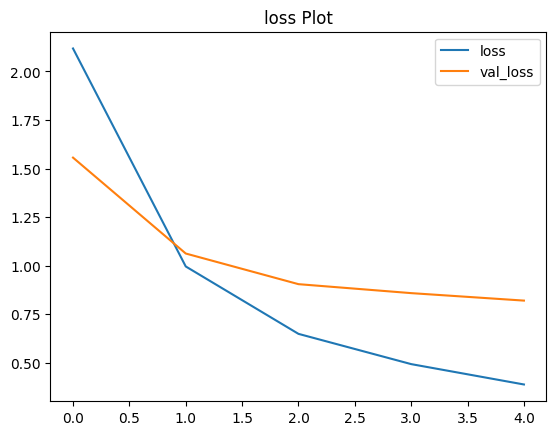

In [42]:
import pandas as pd

pd.DataFrame(resnet_v2_152_history.history)[["loss", "val_loss"]].plot(title="loss Plot")

<Axes: title={'center': 'Accuracy Plot'}>

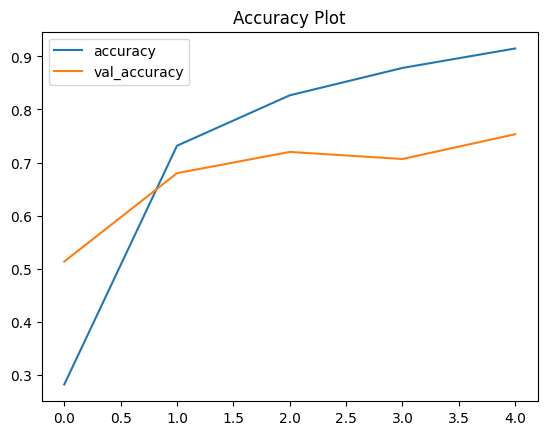

In [43]:
pd.DataFrame(resnet_v2_152_history.history)[["accuracy", "val_accuracy"]].plot(title="Accuracy Plot")

## Experiment - 2

In [34]:
efficient_net_url = "https://tfhub.dev/google/efficientnet/b2/feature-vector/1"

efficient_net_model = define_model(efficient_net_url)

In [35]:
efficient_net_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [36]:
efficient_net_history = efficient_net_model.fit(train_data,
                 epochs=5,
                 steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 validation_steps=len(valid_data),
                                  callbacks=[define_tensorboard_callback("efficient_net")])

Epoch 1/5
19/19 [==============================] - 18s 429ms/step - loss: 1.8383 - accuracy: 0.4533 - val_loss: 1.4233 - val_accuracy: 0.6600
Epoch 2/5
19/19 [==============================] - 5s 213ms/step - loss: 1.0780 - accuracy: 0.8017 - val_loss: 1.0289 - val_accuracy: 0.7267
Epoch 3/5
19/19 [==============================] - 5s 206ms/step - loss: 0.7518 - accuracy: 0.8450 - val_loss: 0.8645 - val_accuracy: 0.7467
Epoch 4/5
19/19 [==============================] - 4s 196ms/step - loss: 0.5949 - accuracy: 0.8717 - val_loss: 0.7757 - val_accuracy: 0.7933
Epoch 5/5
19/19 [==============================] - 6s 296ms/step - loss: 0.4978 - accuracy: 0.9000 - val_loss: 0.7239 - val_accuracy: 0.7933


In [44]:
efficient_net_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_3 (KerasLayer)  (None, 1408)              7768562   
                                                                 
 dense_3 (Dense)             (None, 10)                14090     
                                                                 
Total params: 7,782,652
Trainable params: 14,090
Non-trainable params: 7,768,562
_________________________________________________________________


<Axes: title={'center': 'loss Plot'}>

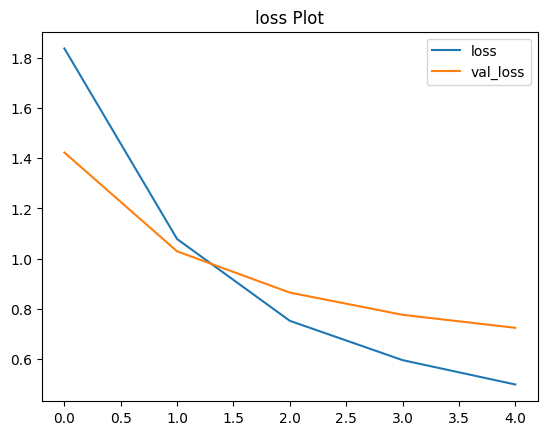

In [45]:
import pandas as pd

pd.DataFrame(efficient_net_history.history)[["loss", "val_loss"]].plot(title="loss Plot")

<Axes: title={'center': 'loss Plot'}>

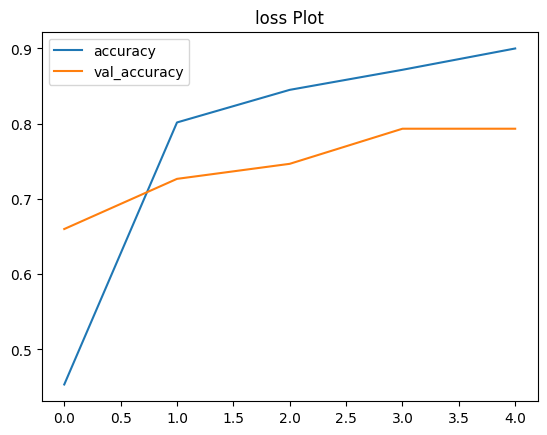

In [46]:
pd.DataFrame(efficient_net_history.history)[["accuracy", "val_accuracy"]].plot(title="loss Plot")

In [54]:
%reload_ext tensorboard
%tensorboard --logdir="./tensorboard"

ERROR: Failed to launch TensorBoard (exited with 1).
Contents of stderr:
2023-06-18 12:32:29.101703: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Address already in use
Port 6006 is in use by another program. Either identify and stop that program, or start the s